# Sprint 9: Valida Hipotesis de Negocio con pruebas estadísticas

## 🎯 Objetivo de la sesión
Al finalizar la clase, podrás:
1. Diferenciar **Pearson** y **Spearman** y elegir cuál usar según el tipo de relación.
2. Interpretar correctamente el resultado.
3. Medir asociación entre distintos tipos de variables:
   - Numérica vs Numérica (Pearson / Spearman)
   - Categórica binaria vs Numérica (Point-biserial)
   - Categórica vs Categórica (Cramér’s V)
4. Usar visualizaciones para validar correlaciones (scatter, regplot, box/strip, tablas en heatmap).
5. Aplicar funciones simples que automaticen el análisis según el tipo de variables.

---

## 🗓️ Agenda
1. **Repaso express**: correlación ≠ causalidad + Simpson (alerta temprana).
2. **Teoría**
6. **Ejercicios y práctica** 

## ¿Qué es la estadística inferencial?

**Estadística descriptiva**: resume lo que ya tienes (promedios, medianas, gráficos, dispersión).  
**Estadística inferencial**: usa una **muestra** para decir algo sobre una **población**, con incertidumbre controlada.

Ejemplo:
- Descriptiva: “En estos 500 pedidos, el ticket promedio fue $42”.
- Inferencial: “Con estos 500 pedidos, estimo que el ticket promedio de todos los pedidos es ~ $42 y esta diferencia vs otro grupo es estadísticamente significativa”.

---

## Población vs muestra

- **Población**: *todo* lo que te interesa (todos los usuarios, todas las órdenes del año, todos los huéspedes de un mercado, etc.).
- **Muestra**: el subconjunto que observas (usuarios de una semana, 10k sesiones, 200 reservas).

**Por qué importa**: casi nunca puedes medir la población completa (tiempo, dinero, acceso). Entonces muestrear bien es la clave.

---

## Muestreo aleatorio 

**Muestreo aleatorio** = cada unidad de la población tiene una probabilidad conocida (idealmente igual) de ser seleccionada.

### ¿Por qué?
Porque reduce sesgos y permite que la teoría (p-valores, intervalos, etc.) funcione.


## Ley de los grandes números (LLN)

La **Ley de los Grandes Números** dice (en lenguaje humano):

> Si tomas muchas observaciones **independientes** del mismo proceso, el promedio de la muestra tiende al promedio real de la población.


**Ojo**: *más datos no arregla un muestreo sesgado*. Solo hace que estés muy seguro… de una conclusión incorrecta.

---

## ¿Qué es una prueba de hipótesis?

Una **prueba de hipótesis** es un procedimiento para evaluar evidencia contra una afirmación “por defecto”.

### Componentes
- **H₀ (hipótesis nula)**: “no hay efecto / no hay diferencia”.
- **H₁ (hipótesis alternativa)**: “sí hay efecto / sí hay diferencia”.

Ejemplo A/B (conversión):
- H₀: p_A = p_B (misma tasa de conversión)
- H₁: p_A ≠ p_B (son diferentes)  
  o p_B > p_A (B mejora)

### Error tipo I y II
- **Tipo I (α)**: dices “sí hay efecto” pero era falso (falso positivo).
- **Tipo II (β)**: dices “no hay efecto” pero sí existía (falso negativo).
- **Poder (1−β)**: probabilidad de detectar un efecto real.

---

## ¿Qué es el p-valor?

El **p-valor** es:

> La probabilidad de observar un resultado **tan extremo como el obtenido** (o más), **asumiendo que H₀ es verdadera**.

### Interpretación correcta
- p pequeño → tus datos son raros si H₀ fuera cierta → evidencia contra H₀.
- p grande → tus datos no son raros bajo H₀ → no tienes evidencia suficiente para rechazar H₀.

### Interpretaciones incorrectas (clásicos del terror)
- ❌ “p es la probabilidad de que H₀ sea verdadera” (no).
- ❌ “p grande prueba que no hay efecto” (solo dice que no detectaste evidencia).
- ❌ “si p < 0.05, el efecto es importante” (significativo ≠ relevante).

**Significancia estadística** responde: *¿hay evidencia?*  
**Significancia práctica** responde: *¿vale la pena para el negocio?*

---

## Preguntas de negocio que requieren pruebas de hipótesis

### Producto / Growth
- ¿El nuevo onboarding aumentó la conversión de signup→activación?
- ¿Un cambio en pricing redujo el churn?
- ¿El rediseño del botón aumentó el CTR?

### Marketing
- ¿La campaña A generó un CTR mayor que la campaña B?
- ¿Cambiar el asunto del email aumentó la tasa de apertura?

### Operaciones / Customer Success
- ¿El nuevo proceso redujo el tiempo promedio de resolución de tickets?
- ¿Cambiar el proveedor mejoró la proporción de entregas a tiempo?

### Revenue / STR
- ¿Bajar el mínimo de noches de 3 a 2 aumentó la ocupación?
- ¿Cambiar la tarifa de limpieza impactó el porcentaje de reservas confirmadas?

---

## Tabla guía: pruebas comunes en negocio (promedios vs proporciones)

> Nota práctica: en cursos intro, se enseña “t para promedios” y “z para proporciones”.  

| Caso de negocio | Variable | Pregunta típica | Prueba recomendada | H₀ | H₁ | Ejemplo (business) |
|---|---|---|---|---|---|---|
| Comparar **promedios** entre 2 grupos independientes | Numérica continua (ticket, tiempo, rating, revenue) | “¿El promedio cambió?” | **t-test** (2 muestras) | μ₁ = μ₂ | μ₁ ≠ μ₂ (o μ₂ > μ₁) | Ticket promedio antes vs después de una promo |
| Comparar **promedios** contra un valor objetivo | Numérica continua | “¿Estamos por encima del SLA?” | **t-test** (1 muestra) | μ = μ₀ | μ ≠ μ₀ (o μ < μ₀) | Tiempo promedio de entrega vs 2 días objetivo |
| Comparar **proporciones** entre 2 grupos | Binaria (convierte sí/no, churn sí/no, click sí/no) | “¿La tasa cambió?” | **z-test de proporciones** | p₁ = p₂ | p₁ ≠ p₂ (o p₂ > p₁) | Conversión A/B: versión B vs A |
| Comparar **proporción** contra benchmark | Binaria | “¿Superamos 3%?” | **z-test de 1 proporción** | p = p₀ | p ≠ p₀ (o p > p₀) | Tasa de defectos vs límite aceptable |

---

## Ejemplos de formulación H₀/H₁ en contexto

### A) Promedios (t-test): Ticket promedio
**Contexto**: quieres saber si una promo subió el ticket promedio.
- Grupo 1: pedidos sin promo
- Grupo 2: pedidos con promo

Hipótesis:
- H₀: μ_promo = μ_sin_promo
- H₁: μ_promo > μ_sin_promo

Decisión:
- Si p < 0.05 → rechazas H₀ → evidencia de que la promo **sube** el ticket promedio.
- Si p ≥ 0.05 → no rechazas H₀ → no hay evidencia suficiente.

---

### B) Proporciones (z-test): Conversión
**Contexto**: comparar conversiones de landing A vs landing B.
- A: p_A = conversiones_A / visitas_A
- B: p_B = conversiones_B / visitas_B

Hipótesis:
- H₀: p_A = p_B
- H₁: p_B > p_A

Decisión:
- Si p < 0.05 → evidencia de que B convierte más.
- Si p ≥ 0.05 → no hay evidencia suficiente para afirmar mejora.


## PRACTIQUEMOS

### Muestreos aleatorios

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

data=pd.read_csv('https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/ab_testing.csv')

display(data.head())

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [16]:
#Funcion limpiar nombres columnas
def clean_column_names(df):
    '''
    Esta función limpia los nombres de las columnas de un DataFrame, eliminando espacios, convirtiendo a minúsculas y reemplazando espacios por guiones bajos.
    
    :param df: Dataset en formato DataFrame
    :return: DataFrame con nombres de columnas limpios
    '''
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [17]:
# Paso 1: Limpiar los nombres de las columnas y arreglar el tipo de dato de la columna 'conversion'
data = clean_column_names(data)

data['conversion'] = data['conversion'].replace({'Yes': 1, 'No': 0})

display(data.head())

,user_id,group,page_views,time_spent,conversion,device,location
0,14292,B,3,424,0,Mobile,Northern Ireland
1,11682,A,9,342,0,Mobile,Scotland
2,19825,A,2,396,0,Desktop,Northern Ireland
3,16080,B,4,318,0,Desktop,Wales
4,18851,A,1,338,1,Desktop,Scotland


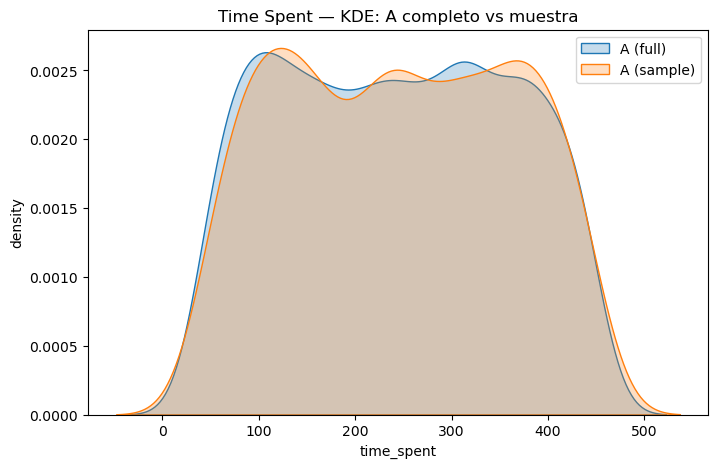

In [47]:
#Tomar muestras aleatorias de cada grupo
grupo_A_sample = data[data['group'] == 'A'].sample(n=1000, random_state=42)
grupo_B_sample = data[data['group'] == 'B'].sample(n=1000, random_state=42)

#Comparemos las distribuciones de 'time_spent' para ambos grupos utilizando un gráfico de densidad (KDE):

plt.figure(figsize=(8,5))

sns.kdeplot(data=data[data["group"]=="A"], x="time_spent", fill=True, label="A (full)")
sns.kdeplot(data=grupo_A_sample, x="time_spent", fill=True, label="A (sample)")

plt.title("Time Spent — KDE: A completo vs muestra")
plt.xlabel("time_spent")
plt.ylabel("density")
plt.legend()
plt.show()

Text(0.5, 0, 'location')

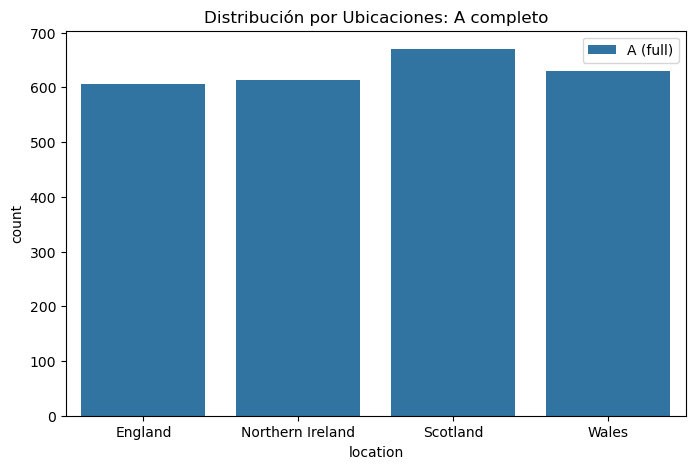

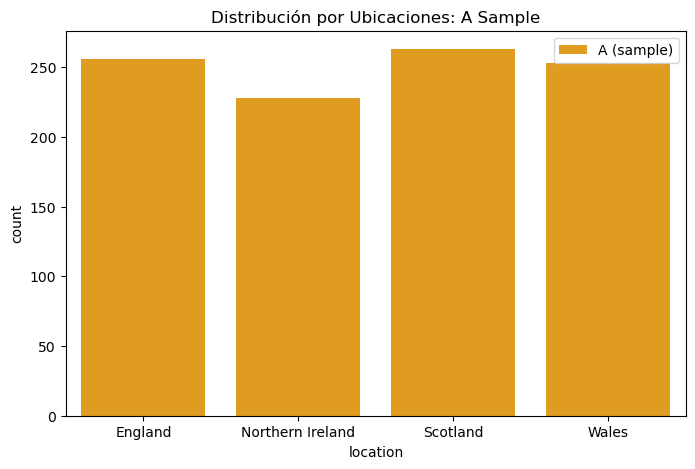

In [56]:
#Veamos la distribucion por paises de cada grupo de la poblacion Vs muestra

plt.figure(figsize=(8,5))
sns.countplot(data=data[data["group"]=="A"].sort_values(by="location"), x="location", label="A (full)")
plt.title("Distribución por Ubicaciones: A completo")
plt.xlabel("location")


plt.figure(figsize=(8,5))
sns.countplot(data=grupo_A_sample.sort_values(by="location"), x="location", label="A (sample)", color="orange")
plt.title("Distribución por Ubicaciones: A Sample")
plt.xlabel("location")

### Pruebas de hipotesis

### Pregunta de negocio: ¿El tiempo promedio invertido en la página cambió?

H0= No hay diferencias en el tiempo promedio que los usuarios gastan en la pagina A y B

H1= Sí hay una diferencia en el tiempo promedio que los usuarios gastan en la pagina A y B

**¿Qué tipo de prueba es? ¿De una cola o dos colas?**

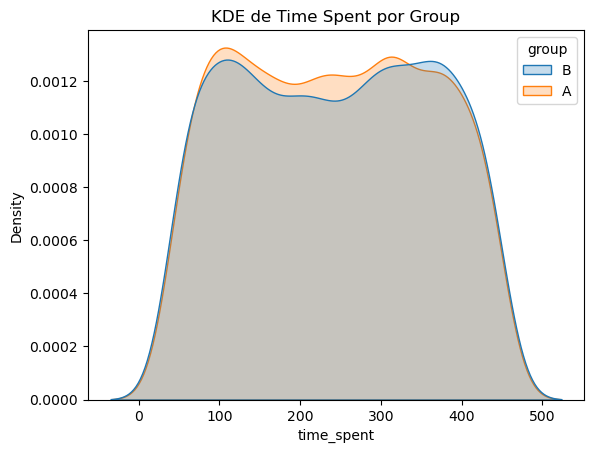

In [19]:
# Paso 1: Entender los datos

sns.kdeplot(data=data, x="time_spent", hue="group", fill=True)
plt.title("KDE de Time Spent por Group")
plt.show()


In [24]:
#Segmentamos los datos por grupo
data_A = data[data['group'] == 'A']['time_spent']
data_B = data[data['group'] == 'B']['time_spent']

# ¿Que dicen las estadisticas descriptivas?
print("Grupo A - Estadísticas Descriptivas:")
print(data_A.describe())

print("\nGrupo B - Estadísticas Descriptivas:")
print(data_B.describe())



Grupo A - Estadísticas Descriptivas:
count    2519.000000
mean      241.733227
std       117.340026
min        40.000000
25%       137.500000
50%       241.000000
75%       343.000000
max       449.000000
Name: time_spent, dtype: float64

Grupo B - Estadísticas Descriptivas:
count    2481.000000
mean      243.303910
std       119.193552
min        40.000000
25%       136.000000
50%       244.000000
75%       348.000000
max       449.000000
Name: time_spent, dtype: float64


In [22]:
#Prueba de Levene para igualdad de varianzas
'''
Ho: Las varianzas de los dos grupos son iguales.
Ha: Las varianzas de los dos grupos son diferentes.
'''
from scipy.stats import levene
stat, p_value = levene(data_A, data_B)
print(f"Levene's test statistic: {stat}, p-value: {p_value}")

#Interpretacion del P.value
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de igualdad de varianzas.")
else:   print("No rechazamos la hipótesis nula de igualdad de varianzas.")

Levene's test statistic: 1.64873612875645, p-value: 0.19919055717509185
No rechazamos la hipótesis nula de igualdad de varianzas.


In [23]:
#Prueba t de Student para muestras independientes
'''
Ho: Las medias de los dos grupos son iguales.
Ha: Las medias de los dos grupos son diferentes.
'''

from scipy.stats import ttest_ind
stat, p_value = ttest_ind(data_A, data_B, equal_var=True, alternative='two-sided')
print(f"T-test statistic: {stat}, p-value: {p_value}")

#Interpretacion del P.value
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de igualdad de medias.")
else:    print("No rechazamos la hipótesis nula de igualdad de medias.")


T-test statistic: -0.46954858146462514, p-value: 0.6386980515632602
No rechazamos la hipótesis nula de igualdad de medias.


**CONCLUSION**
No hay suficiente evidencia que demuestre que el tiempo promedio que los usuarios gastan en las versiones A y B sea diferente

### Pregunta de negocio: ¿Existe una mejora en la tasa de conversión de la página B respecto a la A?

H0= No hay una mejora en la tasa de conversion de la pagina B respecto a la A

H1= Sí hay una mejora en la tasa de conversion de la pagina B respecto a la A

**¿Qué tipo de prueba es? ¿De una cola o dos colas?**

Text(0.5, 1.0, 'Tasa de Conversión por Grupo')

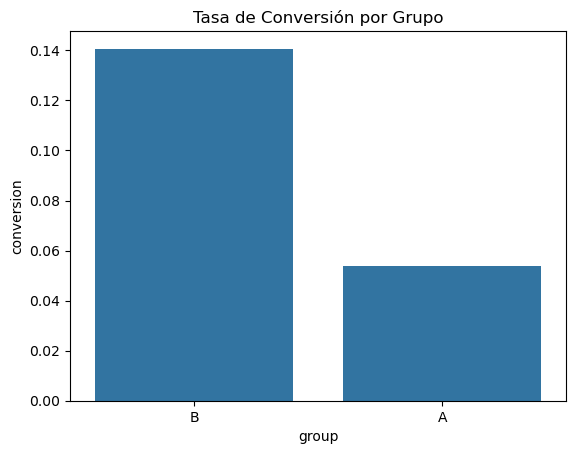

In [26]:
# Paso 1: Entender los datos

sns.barplot(x='group', y='conversion', data=data, errorbar=None)
plt.title("Tasa de Conversión por Grupo")

In [34]:
#Segmentar los datos por grupo y contar el número de conversiones
conversion_A = data[data['group'] == 'A']['conversion'].sum()
conversion_B = data[data['group'] == 'B']['conversion'].sum()
print(f"Conversión del Grupo A: {conversion_A}")
print(f"Conversión del Grupo B: {conversion_B}")

Total_A = data[data['group'] == 'A']['conversion'].count()
Total_B = data[data['group'] == 'B']['conversion'].count()
print(f"Total del Grupo A: {Total_A}")
print(f"Total del Grupo B: {Total_B}")

#Agruparlos en listas
conversiones = [conversion_A, conversion_B]
totales = [Total_A, Total_B]

print(conversiones)
print(totales)

Conversión del Grupo A: 136
Conversión del Grupo B: 349
Total del Grupo A: 2519
Total del Grupo B: 2481
[np.int64(136), np.int64(349)]
[np.int64(2519), np.int64(2481)]


In [41]:
#Otra forma
agrupada = data.groupby('group')['conversion'].agg(['sum', 'count'])
agrupada.columns = ['conversiones', 'total']
print(agrupada)

conversions=list(agrupada['conversiones'].values)
totals=list(agrupada['total'].values)
print(conversions)
print(totals)


       conversiones  total
group                     
A               136   2519
B               349   2481
[np.int64(136), np.int64(349)]
[np.int64(2519), np.int64(2481)]


In [43]:
#Ahora sí, la prueba de proporciones
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest(count=conversions, nobs=totals, alternative='smaller')
print(f"Z-test statistic: {stat}, p-value: {p_value}")

#interpretacion del P.value
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de igualdad de proporciones.")
else:    print("No rechazamos la hipótesis nula de igualdad de proporciones.")


Z-test statistic: -10.354488520266216, p-value: 1.9965755947100969e-25
Rechazamos la hipótesis nula de igualdad de proporciones.


In [44]:
# Ahora medimos ese cambio. ¿Cuanto ha cambiado la tasa de conversión entre el grupo A y el grupo B?
tasa_conversion_A = conversion_A / Total_A
tasa_conversion_B = conversion_B / Total_B

print(f"Tasa de Conversión del Grupo A: {tasa_conversion_A:.4f}")
print(f"Tasa de Conversión del Grupo B: {tasa_conversion_B:.4f}")

print(f"Diferencia de tasas de conversión: {tasa_conversion_B - tasa_conversion_A:.4f}")
print(f"Incremento porcentual: {(tasa_conversion_B - tasa_conversion_A) / tasa_conversion_A * 100:.2f}%")

Tasa de Conversión del Grupo A: 0.0540
Tasa de Conversión del Grupo B: 0.1407
Diferencia de tasas de conversión: 0.0867
Incremento porcentual: 160.55%


## ✅ Hoy Aprendimos...

- Inferencia = concluir sobre población desde una muestra.
- Muestreo aleatorio = la condición para que tus conclusiones se basen en los supuestos correctos
- LLN = con más datos, el promedio se estabiliza (si no hay sesgo).
- p-valor = rareza del resultado asumiendo H₀.
- t-test ≈ comparar **promedios**.
- z-test de proporciones ≈ comparar **tasas**.
